In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt #5matplotlibをimport
import seaborn as sns

In [2]:
dataset_train=pd.read_excel('thermal.xlsx') #excle データをインポート

In [3]:
dataset_train

,t h,Req MΩ,Ceq pF,DFeq,Req pu,Ceq pu,Dfeq pu,ANN output
0,48,590.0,12.5,0.36,0.9410,0.82,1.30,good
1,96,364.2,10.1,0.72,0.5810,0.66,2.62,good
2,144,270.6,9.2,"1,07",0.4310,0.60,3.89,good
3,192,211.4,10.5,1.2,0.3470,0.68,4.34,good
4,240,206.8,10.9,"1,18",0.3390,0.71,4.28,good
5,288,225.1,14.6,0.81,0.3690,0.95,2.94,good
6,336,244.0,12.4,0.88,0.3990,0.81,3.18,good
7,384,235.3,13.5,0.84,0.3750,0.88,3.03,good
8,432,120.1,15.9,1.39,0.1920,1.04,5.04,thermal
9,480,76.6,14.1,2.45,0.1220,0.92,8.90,thermal


In [4]:
# import some data to play with
X = dataset_train.drop(['t h','Req MΩ','Ceq pF','DFeq','ANN output'],axis=1) 
y = dataset_train['t h'] 

In [5]:
X

,Req pu,Ceq pu,Dfeq pu
0,0.9410,0.82,1.30
1,0.5810,0.66,2.62
2,0.4310,0.60,3.89
3,0.3470,0.68,4.34
4,0.3390,0.71,4.28
5,0.3690,0.95,2.94
6,0.3990,0.81,3.18
7,0.3750,0.88,3.03
8,0.1920,1.04,5.04
9,0.1220,0.92,8.90


Original shape: (19, 3)
Reduced shape: (19, 2)


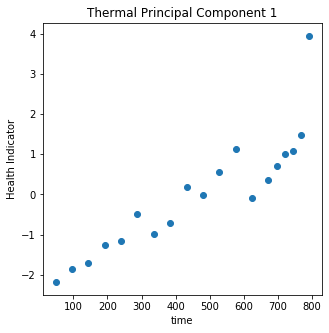

In [15]:
#平均を0に分散を1に前処理
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

x_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(x_pca.shape)))

df_x_pca = pd.DataFrame(x_pca, columns=['Principal Component 1','Principal Component 2'])
df_x_pca["time"] = y
df_x_pca["ANN output"] = dataset_train['ANN output'] 

plt.figure(figsize=(5, 5)) #グラフのサイズ

plt.title('Thermal Principal Component 1')
plt.xlabel('time')
plt.ylabel('Health Indicator')
plt.scatter(df_x_pca["time"], df_x_pca["Principal Component 1"])

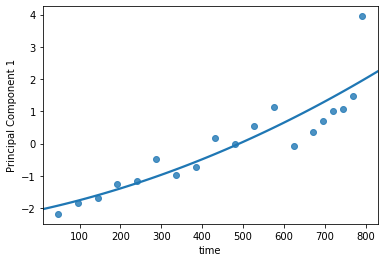

In [14]:
sns.regplot(data=df_x_pca, x='time', y='Principal Component 1',ci=0, order = 2)

In [16]:
df_x_pca

,Principal Component 1,Principal Component 2,time,ANN output
0,-2.179113,1.895661,48,good
1,-1.854489,0.268270,96,good
2,-1.697728,-0.387651,144,good
3,-1.263537,-0.382156,192,good
4,-1.154020,-0.308203,240,good
5,-0.491020,0.571013,288,good
6,-0.985641,0.203422,336,good
7,-0.718103,0.359639,384,good
8,0.185840,0.325109,432,thermal
9,-0.016671,-0.281744,480,thermal
